In [2]:
import cv2
from time import time
import mediapipe as mp
import matplotlib.pyplot as plt
import os
import pandas as pd

In [3]:
# Initializing mediapipe pose class.
mp_pose = mp.solutions.pose

# Setting up the Pose function.
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.3, model_complexity=2)

# Initializing mediapipe drawing class, useful for annotation.
mp_drawing = mp.solutions.drawing_utils

I0000 00:00:1723117653.669565  275140 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89), renderer: Apple M1


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


W0000 00:00:1723117653.878070  275783 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1723117653.963161  275787 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


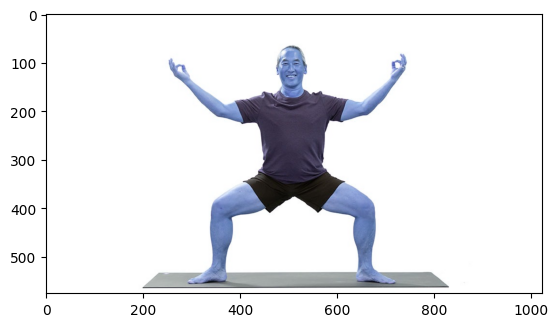

In [4]:
sample_img = cv2.imread('sample images/goddess1.jpg')
plt.imshow(sample_img)

In [5]:
# Perform pose detection after converting the image into RGB format.
results = pose.process(cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB))

# Check if any landmarks are found.
if results.pose_landmarks:

    # Iterates all 33 landmarks.
    for i in range(33):

        # Display the found normalized landmarks.
        print(f'{mp_pose.PoseLandmark(i).name}:\n{results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value]}')

NOSE:
x: 0.495945066
y: 0.198736131
z: -0.421437293
visibility: 0.999994397

LEFT_EYE_INNER:
x: 0.502874613
y: 0.180078655
z: -0.397858649
visibility: 0.999975681

LEFT_EYE:
x: 0.508401215
y: 0.181101263
z: -0.39811945
visibility: 0.999968052

LEFT_EYE_OUTER:
x: 0.513080299
y: 0.182193518
z: -0.398052961
visibility: 0.999976516

RIGHT_EYE_INNER:
x: 0.488858521
y: 0.179369718
z: -0.398979157
visibility: 0.999985218

RIGHT_EYE:
x: 0.483338296
y: 0.180948228
z: -0.399353325
visibility: 0.999983668

RIGHT_EYE_OUTER:
x: 0.479342639
y: 0.182917684
z: -0.399505436
visibility: 0.999986053

LEFT_EAR:
x: 0.519154847
y: 0.194866896
z: -0.258615226
visibility: 0.999970555

RIGHT_EAR:
x: 0.472986192
y: 0.198589325
z: -0.262832731
visibility: 0.999950051

MOUTH_LEFT:
x: 0.506034613
y: 0.223300248
z: -0.366985142
visibility: 0.999970436

MOUTH_RIGHT:
x: 0.488530427
y: 0.224860489
z: -0.370459646
visibility: 0.99996829

LEFT_SHOULDER:
x: 0.561987936
y: 0.326337874
z: -0.161295816
visibility: 0.9998521

/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [6]:
df=pd.read_csv('data/pose_landmarks_with_categories (3).csv')
df.columns

Index(['x_0_landmark', 'y_0_landmark', 'z_0_landmark', 'x_1_landmark',
       'y_1_landmark', 'z_1_landmark', 'x_2_landmark', 'y_2_landmark',
       'z_2_landmark', 'x_3_landmark', 'y_3_landmark', 'z_3_landmark',
       'x_4_landmark', 'y_4_landmark', 'z_4_landmark', 'x_5_landmark',
       'y_5_landmark', 'z_5_landmark', 'x_6_landmark', 'y_6_landmark',
       'z_6_landmark', 'x_7_landmark', 'y_7_landmark', 'z_7_landmark',
       'x_8_landmark', 'y_8_landmark', 'z_8_landmark', 'x_9_landmark',
       'y_9_landmark', 'z_9_landmark', 'x_10_landmark', 'y_10_landmark',
       'z_10_landmark', 'x_11_landmark', 'y_11_landmark', 'z_11_landmark',
       'x_12_landmark', 'y_12_landmark', 'z_12_landmark', 'x_13_landmark',
       'y_13_landmark', 'z_13_landmark', 'x_14_landmark', 'y_14_landmark',
       'z_14_landmark', 'x_15_landmark', 'y_15_landmark', 'z_15_landmark',
       'x_16_landmark', 'y_16_landmark', 'z_16_landmark', 'x_17_landmark',
       'y_17_landmark', 'z_17_landmark', 'x_18_landmark

In [7]:
df.shape ##1551 rows initially

(925, 100)

In [8]:
df.head()

,x_0_landmark,y_0_landmark,z_0_landmark,x_1_landmark,y_1_landmark,z_1_landmark,x_2_landmark,y_2_landmark,z_2_landmark,x_3_landmark,...,x_30_landmark,y_30_landmark,z_30_landmark,x_31_landmark,y_31_landmark,z_31_landmark,x_32_landmark,y_32_landmark,z_32_landmark,category
0,0.385088,0.702528,-0.004813,0.364044,0.705284,-0.031443,0.361665,0.700772,-0.031415,0.359246,...,0.870050,0.811647,0.241523,0.781881,0.930616,-0.215825,0.763475,0.904604,0.165081,downdog
1,0.470272,0.692148,-0.603851,0.445808,0.705755,-0.624271,0.437684,0.700140,-0.624357,0.429641,...,0.736252,0.645022,0.416895,0.777984,0.569776,0.540953,0.764087,0.639365,0.467059,downdog
2,0.457960,0.611624,-0.056058,0.445560,0.626206,-0.063305,0.444582,0.626343,-0.063149,0.443087,...,0.826031,0.732188,0.350803,0.769650,0.796510,0.025728,0.744105,0.759688,0.268453,downdog
3,0.403646,0.384415,-0.141834,0.389138,0.391143,-0.165595,0.379477,0.394304,-0.165468,0.370748,...,0.434681,0.536828,0.245416,0.529571,0.693996,0.250992,0.392867,0.589671,0.212160,downdog
4,0.457537,0.691027,-0.142890,0.440245,0.701153,-0.129924,0.429693,0.702569,-0.130079,0.420844,...,0.724063,0.800438,0.393169,0.645076,0.864819,0.068033,0.630305,0.837502,0.337801,downdog


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the dataset
file_path = 'data/pose_landmarks_with_categories (3).csv'
data = pd.read_csv(file_path)

# Split data into features (X) and target (y)
X = data.iloc[:, :-1]  # All columns except the last one
y = data.iloc[:, -1]   # The last column

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Support Vector classifier
clf = SVC(random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the classifier
clf.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test_scaled)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(round(accuracy,3)*100,"%")

Accuracy: 0.8432432432432433
84.3 %


In [10]:
import joblib
joblib.dump(clf, 'models/svc3.sav')

['models/svc3.sav']

In [11]:
# To load the model directly
loaded_model = joblib.load('models/svc3.sav')

In [12]:
def extract_landmarks(image):
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    if results.pose_landmarks:
        landmarks = results.pose_landmarks.landmark
        row = []
        for landmark in landmarks:
            row.extend([landmark.x, landmark.y, landmark.z])
        
        # Draw landmarks on the image
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
        
        return row, image
    else:
        return None, image

# Function to preprocess the image
def preprocess_image(image_path):
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Image at path {image_path} could not be loaded.")
    
    # Extract landmarks
    landmarks, landmarked_image = extract_landmarks(image)
    
    if landmarks is None:
        raise ValueError("No pose landmarks detected in the image.")
    
    return landmarks, landmarked_image

# Function to predict using the trained model
def predict_image(model, scaler, image_path):
    # Preprocess the image
    features, landmarked_image = preprocess_image(image_path)
    
    # Scale the features
    features_scaled = scaler.transform([features])
    
    # Make a prediction
    prediction = model.predict(features_scaled)
    
    # Display the image with landmarks
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(landmarked_image, cv2.COLOR_BGR2RGB))
    plt.title(f'Predicted Category: {prediction[0]}')
    plt.axis('off')
    plt.show()
    
    return prediction

/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


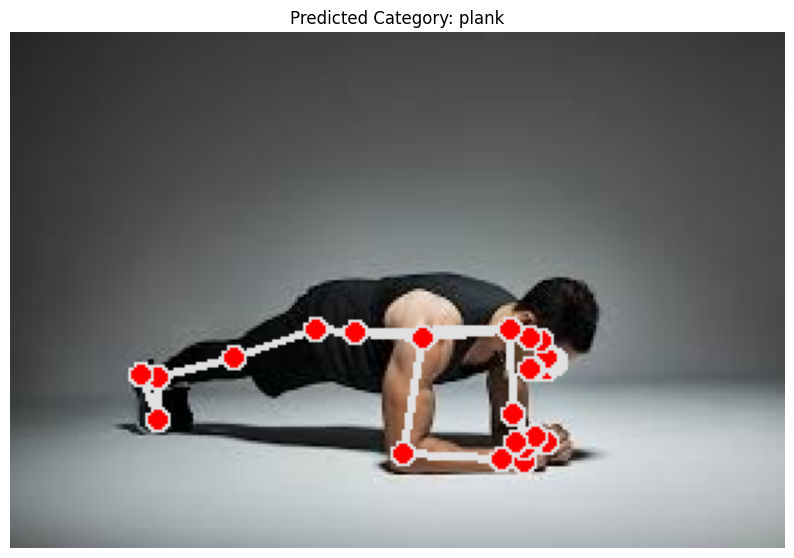

Predicted Category: plank


In [13]:
image_path = "sample images/plank1.jpeg"
predicted_category = predict_image(clf, scaler, image_path)
print(f'Predicted Category: {predicted_category[0]}')

/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


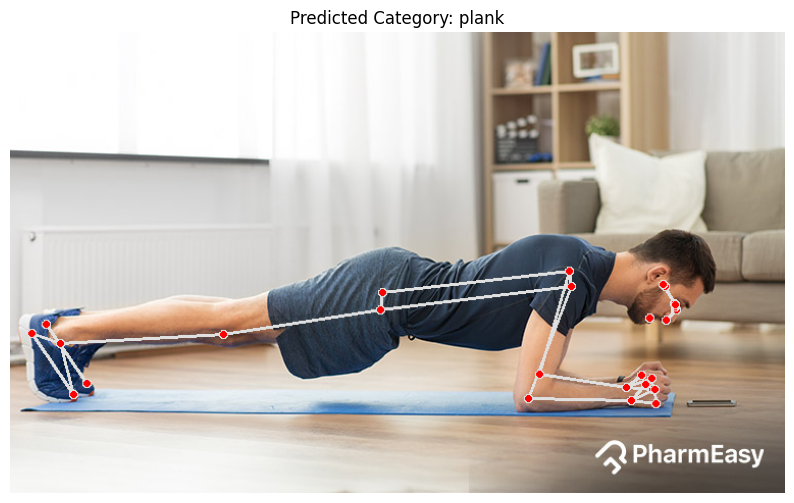

Predicted Category: plank


In [14]:
# Example usage
image_path = "sample images/plank2.jpg"
predicted_category = predict_image(clf, scaler, image_path)
print(f'Predicted Category: {predicted_category[0]}')

/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


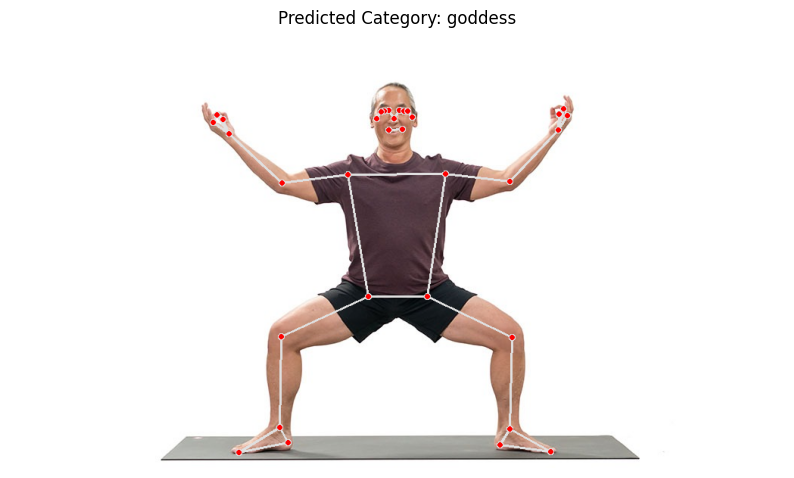

Predicted Category: goddess


In [15]:
image_path = "sample images/goddess1.jpg"
predicted_category = predict_image(clf, scaler, image_path)
print(f'Predicted Category: {predicted_category[0]}')

In [16]:
import warnings
warnings.filterwarnings("ignore")

In [17]:
# Initialize Mediapipe Pose
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils
pose = mp_pose.Pose()

# Function for real-time pose estimation and classification
def real_time_pose_estimation(model, scaler):
    cap = cv2.VideoCapture(0)
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        landmarks, landmarked_image = extract_landmarks(frame)
        
        if landmarks:
            features_scaled = scaler.transform([landmarks])
            prediction = model.predict(features_scaled)
            cv2.putText(landmarked_image, f'Predicted Category: {prediction[0]}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)
        
        cv2.imshow('Pose Estimation', landmarked_image)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

# Call the function to start real-time pose estimation
real_time_pose_estimation(clf, scaler)

I0000 00:00:1723117656.887086  275140 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89), renderer: Apple M1
W0000 00:00:1723117657.045973  275827 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1723117657.057851  275827 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Accuracy: 0.8432432432432433
84.3 %


### Trying by dropping points 23 - 32

In [20]:
import pandas as pd
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the dataset
file_path = 'data/pose_landmarks_with_categories (3).csv'
data = pd.read_csv(file_path)

# Split data into features (X) and target (y), dropping the last 10 features
X = data.iloc[:, :-31]  # All columns except the last 31 (x, y, z coordinates for 10 points)
y = data.iloc[:, -1]   # The last column

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Support Vector classifier with probability enabled
clf = SVC(random_state=42, probability=True)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the classifier
clf.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test_scaled)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(round(accuracy, 3) * 100, "%")

Accuracy: 0.7351351351351352
73.5 %


In [23]:
def extract_landmarks(image):
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    if results.pose_landmarks:
        landmarks = results.pose_landmarks.landmark
        row = []
        for landmark in landmarks[:-10]:  # Drop the last 10 landmarks
            row.extend([landmark.x, landmark.y, landmark.z])
        
        # Draw landmarks on the image
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
        
        return row, image
    else:
        return None, image

# Function to preprocess the image
def preprocess_image(image_path):
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Image at path {image_path} could not be loaded.")
    
    # Extract landmarks
    landmarks, landmarked_image = extract_landmarks(image)
    
    if landmarks is None:
        raise ValueError("No pose landmarks detected in the image.")
    
    return landmarks, landmarked_image

# Function to predict using the trained model
def predict_image(model, scaler, image_path, threshold=0.7):
    # Preprocess the image
    features, landmarked_image = preprocess_image(image_path)
    
    # Scale the features
    features_scaled = scaler.transform([features])
    
    # Make a prediction with probabilities
    prediction_prob = model.predict_proba(features_scaled)
    prediction_class = model.predict(features_scaled)
    max_prob = max(prediction_prob[0])
    
    if max_prob >= threshold:
        prediction = prediction_class[0]
    else:
        prediction = 'No action'
    
    # Display the image with landmarks
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(landmarked_image, cv2.COLOR_BGR2RGB))
    plt.title(f'Predicted Category: {prediction} (Confidence: {max_prob:.2f})')
    plt.axis('off')
    plt.show()
    
    return prediction

# Initialize Mediapipe Pose
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils
pose = mp_pose.Pose()

# Function for real-time pose estimation and classification
def real_time_pose_estimation(model, scaler, threshold=0.85):
    cap = cv2.VideoCapture(0)
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        landmarks, landmarked_image = extract_landmarks(frame)
        
        if landmarks:
            features_scaled = scaler.transform([landmarks])
            prediction_prob = model.predict_proba(features_scaled)
            prediction_class = model.predict(features_scaled)
            max_prob = max(prediction_prob[0])
            
            if max_prob >= threshold:
                prediction = prediction_class[0]
            else:
                prediction = 'No action'
            
            cv2.putText(landmarked_image, f'Predicted Category: {prediction} (Confidence: {max_prob:.2f})', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)
        
        cv2.imshow('Pose Estimation', landmarked_image)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

# Call the function to start real-time pose estimation
real_time_pose_estimation(clf, scaler)

I0000 00:00:1723117985.494520  275140 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89), renderer: Apple M1
W0000 00:00:1723117985.643040  280901 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1723117985.653241  280901 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
